# Time Series with Statsmodels Exercises - Solutions

Data source: https://fred.stlouisfed.org/series/IPG2211A2N

In [1]:
# Import the necessary packages and data
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
%matplotlib inline

url = 'https://raw.githubusercontent.com/PippleNL/DSMediorSligro/main/data/EnergyProduction.csv'
df = pd.read_csv(url,index_col=0,parse_dates=True)
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


### 1. Assign the frequency 'MS' (montly start) to the DatetiimeIndex

In [2]:
df.index.freq = 'MS'

#Proof
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

### 2. Plot the dataset

In this set of exercises, it may be helpful to display the plots bigger than the default size. Use figsize=(12,6) as an argument within the .plot()-function.

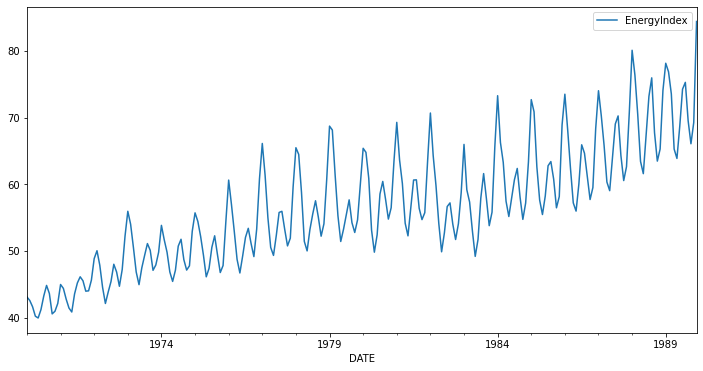

In [3]:
df.plot(figsize=(12,6));

### 3. Add a column that gives the 12-month Simple Moving Average (SMA) and plot the result against the original column

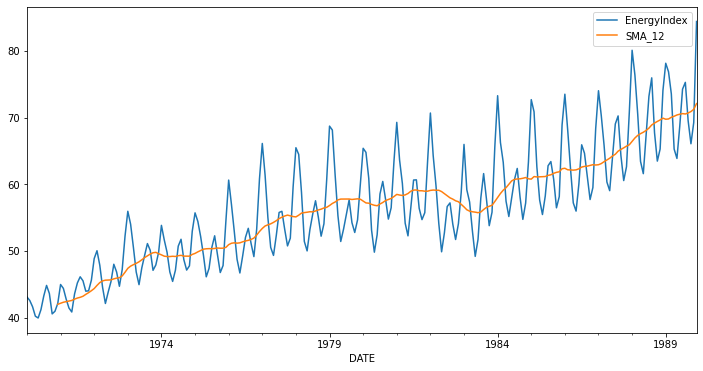

In [4]:
df['SMA_12'] = df['EnergyIndex'].rolling(window=12).mean()
df.plot(figsize=(12,6));

### 4. Add a column that gives the Exponentially Weighted Moving Average (EWMA) with a span of 12 months using the statsmodels <tt>SimpleExpSmoothing</tt> function. Plot the result

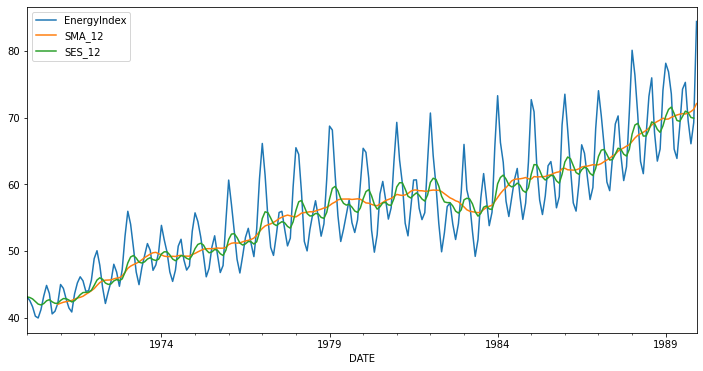

In [5]:
df['SES_12']=SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=2/(12+1),optimized=False).fittedvalues.shift(-1)
df.plot(figsize=(12,6));

### 5. Add a column that shows the Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result

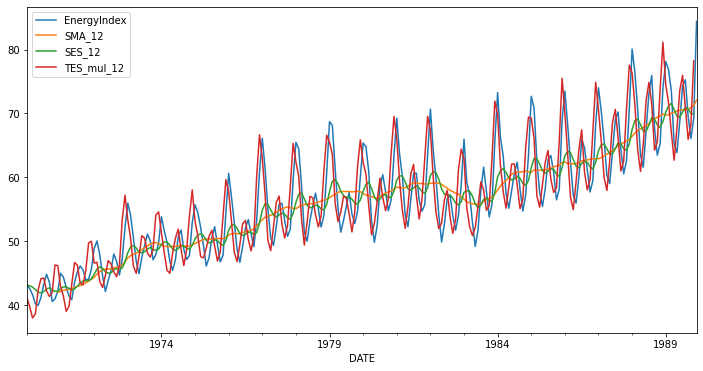

In [6]:
df['TES_mul_12'] = ExponentialSmoothing(df['EnergyIndex'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)
df.plot(figsize=(12,6));

### 6. Now plot the same information as for question 5, but only for the first 2 years (=24 months)

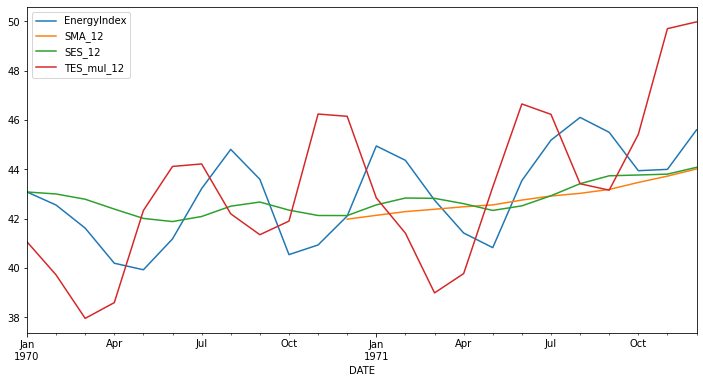

In [7]:
df.iloc[:24].plot(figsize=(12,6));